In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
import pandas as pd
df1 = pd.read_csv("./test_rev5.txt", delimiter = "\t")
df2 = pd.read_csv("./train_col.txt", delimiter = "\t")

In [2]:
import pandas as pd
df1 = pd.read_excel("./train_rev5.xlsx",index_col=0,parse_dates=[0])
df2 = pd.read_excel("./test_rev5.xlsx",index_col=0,parse_dates=[0])

In [3]:
df1.head(5)

,country,description,designation,price,province,region_1,region_2,taster_name,title,variety,...,designation_len_modify,price_modify,province_modify,continent,grade_germany,grade_italy,grade_spain,grade_france,Rating_Avg,pre_points
id,,,,,,,,,,,,,,,,,,,,,
1,US,"Fresh and creamy, this spent time in 80% neutr...",NaN,20.0,Oregon,Eola-Amity Hills,Willamette Valley,Paul Gregutt,Keeler 2013 Pinot Gris (Eola-Amity Hills),Pinot Gris,...,0,1,0.265387,North America,0,0,0,0,87.00,89
2,US,"This wine smells and tastes clean and fresh, l...",NaN,14.0,California,Mendocino County,NaN,Jim Gordon,Shooting Star 2013 Chardonnay (Mendocino County),Chardonnay,...,0,1,0.223230,North America,0,0,0,0,93.33,88
3,Italy,"This is an easy wine to drink with a soft, gen...",NaN,25.0,Central Italy,Montefalco Rosso,NaN,NaN,Madonna Alta 2004 Montefalco Rosso,Red Blend,...,0,1,0.217760,Europe,0,0,0,0,NaN,87
4,US,This has an extraordinarily-high level of resi...,Trust Winery Limited,65.0,California,Mendocino Ridge,NaN,NaN,Stephen & Walker 2010 Trust Winery Limited Cha...,Chardonnay,...,20,1,0.223230,North America,0,0,0,0,91.83,88
6,US,"Soft, fruity, dry and hot, with jammy cherry a...",Reserve,24.0,California,Livermore Valley,Central Coast,NaN,Rodrigue Molyneaux 2006 Reserve Cabernet Sauvi...,Cabernet Sauvignon,...,7,1,0.223230,North America,0,0,0,0,88.00,85


In [80]:
#unique index 바꾸기

df1['country'] = df1['country'].map(df1['country'].value_counts())
df1['description'] = df1['description'].map(df1['description'].value_counts())
df1['designation'] = df1['designation'].map(df1['designation'].value_counts())
df1['province'] = df1['province'].map(df1['province'].value_counts())
df1['region_1'] = df1['region_1'].map(df1['region_1'].value_counts())
df1['region_2'] = df1['region_2'].map(df1['region_2'].value_counts())
df1['taster_name'] = df1['taster_name'].map(df1['taster_name'].value_counts())
df1['taster_twitter_handle'] = df1['taster_twitter_handle'].map(df1['taster_twitter_handle'].value_counts())
df1['title'] = df1['title'].map(df1['title'].value_counts())
df1['variety'] = df1['variety'].map(df1['variety'].value_counts())
df1['winery'] = df1['winery'].map(df1['winery'].value_counts())
df1['vintage'] = df1['vintage'].map(df1['vintage'].value_counts())
df1['continent'] = df1['continent'].map(df1['continent'].value_counts())



df2['country'] = df2['country'].map(df2['country'].value_counts())
df2['description'] = df2['description'].map(df2['description'].value_counts())
df2['designation'] = df2['designation'].map(df2['designation'].value_counts())
df2['province'] = df2['province'].map(df2['province'].value_counts())
df2['region_1'] = df2['region_1'].map(df2['region_1'].value_counts())
df2['region_2'] = df2['region_2'].map(df2['region_2'].value_counts())
df2['taster_name'] = df2['taster_name'].map(df2['taster_name'].value_counts())
df2['taster_twitter_handle'] = df2['taster_twitter_handle'].map(df2['taster_twitter_handle'].value_counts())
df2['title'] = df2['title'].map(df2['title'].value_counts())
df2['variety'] = df2['variety'].map(df2['variety'].value_counts())
df2['winery'] = df2['winery'].map(df2['winery'].value_counts())
df2['vintage'] = df2['vintage'].map(df2['vintage'].value_counts())
df2['continent'] = df2['continent'].map(df2['continent'].value_counts())


In [81]:
#X, y 구분

y = df1.points
#X = df1[['country','description', 'designation_len_modify','price','province','region_1', 'region_2', 'taster_name', 'title','variety','winery' ]]
#X = df1[['country','description', 'designation_len_modify','price','province','region_1', 'region_2', 'taster_name', 'title','variety','winery','vintage_','vintage_modify', 'taster_name_q2_modify','designation_len_modify','designation_modify','price_', 'price_1', 'price_modify', 'variety_modify','province_modify','continent','grade_germany','grade_italy','grade_spain','grade_france','aged','Rating_Avg']]
#X_test_set = df2[['country','description', 'designation_len_modify','price','province','region_1', 'region_2', 'taster_name', 'title','variety','winery','vintage_','vintage_modify', 'taster_name_q2_modify','designation_len_modify','designation_modify','price_', 'price_1', 'price_modify', 'variety_modify','province_modify','continent','grade_germany','grade_italy','grade_spain','grade_france','aged','Rating_Avg']]

#X = df1.drop('points', axis=1),
#X = df1.drop(['points'], axis=1)#.astype('int')

#X = df1[['vintage_','vintage_modify', 'taster_name_q2_modify','designation_len_modify','designation_modify','price_', 'price_1', 'price_modify', 'variety_modify','province_modify'  ]]
#X_test_set = df2[['vintage_','vintage_modify', 'taster_name_q2_modify','designation_len_modify','designation_modify','price_', 'price_1', 'price_modify', 'variety_modify','province_modify'  ]]

#X = X[['vintage','price']].fillna(value=0)
#X = X.replace({'vintage': 'NV '}, {'vintage': 1})
X_test_set.head(5)

,country,description,designation_len_modify,price,province,region_1,region_2,taster_name,title,variety,...,price_modify,variety_modify,province_modify,continent,grade_germany,grade_italy,grade_spain,grade_france,aged,Rating_Avg
id,,,,,,,,,,,,,,,,,,,,,
5,6719.0,37138,33,95.0,1208.0,179.0,NaN,7738.0,36902,3530.0,...,1,0.229454,0.257697,18287,0,0,0,3,0,89.25
14,6719.0,37138,0,26.0,384.0,261.0,NaN,7738.0,36902,44.0,...,1,0.307227,0.278056,18287,0,0,0,0,0,NaN
15,419.0,37138,35,NaN,137.0,NaN,NaN,533.0,36902,121.0,...,0,0.114328,0.286437,426,0,0,0,0,0,NaN
18,1178.0,37138,23,110.0,1004.0,364.0,NaN,4594.0,36902,833.0,...,2,0.270876,0.325043,2612,0,0,0,0,0,NaN
21,5769.0,37138,34,30.0,376.0,208.0,NaN,3187.0,36902,2641.0,...,1,0.215757,0.306304,18287,0,0,0,0,0,96.00


In [82]:
X_test_set.head(5)

,country,description,designation_len_modify,price,province,region_1,region_2,taster_name,title,variety,...,price_modify,variety_modify,province_modify,continent,grade_germany,grade_italy,grade_spain,grade_france,aged,Rating_Avg
id,,,,,,,,,,,,,,,,,,,,,
5,6719.0,37138,33,95.0,1208.0,179.0,NaN,7738.0,36902,3530.0,...,1,0.229454,0.257697,18287,0,0,0,3,0,89.25
14,6719.0,37138,0,26.0,384.0,261.0,NaN,7738.0,36902,44.0,...,1,0.307227,0.278056,18287,0,0,0,0,0,NaN
15,419.0,37138,35,NaN,137.0,NaN,NaN,533.0,36902,121.0,...,0,0.114328,0.286437,426,0,0,0,0,0,NaN
18,1178.0,37138,23,110.0,1004.0,364.0,NaN,4594.0,36902,833.0,...,2,0.270876,0.325043,2612,0,0,0,0,0,NaN
21,5769.0,37138,34,30.0,376.0,208.0,NaN,3187.0,36902,2641.0,...,1,0.215757,0.306304,18287,0,0,0,0,0,96.00


In [83]:
#normalized

import pandas as pd
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)


x = X_test_set.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test_set = pd.DataFrame(x_scaled)

In [84]:
X = X.fillna(X.median())
X_test_set = X_test_set.fillna(X_test_set.median())

In [85]:
# train, test 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 걍 Linear Model

In [88]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
sqrt(mean_squared_error(y_test, predictions))


2.5431736805792813

In [89]:
pd.Series(lm.coef_.flatten(), index=X.columns)

0     -0.612743
1      0.159601
2      0.937426
3     63.807185
4     -0.073799
5      0.174420
6      0.643749
7     -0.228727
8     -0.144791
9      0.206263
10    -0.934769
11    -0.699213
12     1.887684
13     2.261887
14     0.937426
15     0.616709
16    63.724994
17    -1.990029
18   -29.986675
19    -0.587162
20     0.189330
21     0.906889
22     1.409113
23    -0.084706
24    -2.794672
25     1.180923
26    -0.144533
27     0.775380
dtype: float64

## Ridge coefficients

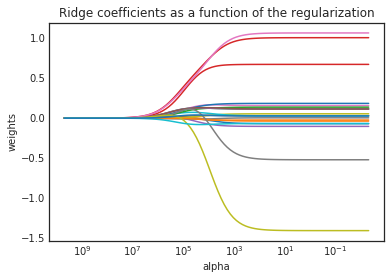

In [15]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [90]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

RidgeCV(alphas=array([5.00000e+09, 3.78232e+09, ..., 6.60971e-03, 5.00000e-03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [91]:
ridgecv.alpha_

1077.2173450159412

In [92]:
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
sqrt(mean_squared_error(y_test, ridge.predict(scale(X_test))))

2.5459033379546456

In [93]:
pd.Series(ridge.coef_.flatten(), index=X.columns)

0    -0.215514
1     0.033300
2     0.101260
3     0.886992
4    -0.033985
5     0.043694
6     0.145096
7    -0.067226
8    -0.032066
9     0.076513
10   -0.291112
11   -0.037903
12    0.143637
13    0.609894
14    0.101260
15    0.094895
16    0.927408
17   -0.380073
18   -1.106249
19   -0.057589
20    0.016773
21    0.243876
22    0.064155
23   -0.008455
24   -0.072912
25    0.143397
26   -0.030794
27    0.073306
dtype: float64

## Lasso coefficients

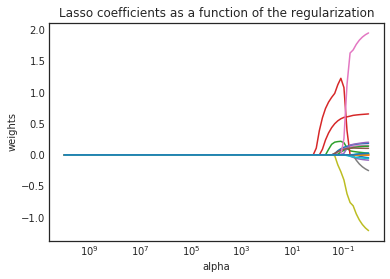

In [20]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [94]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.as_matrix().ravel())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [95]:
lassocv.alpha_

0.00412179160463401

In [96]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
sqrt(mean_squared_error(y_test, lasso.predict(scale(X_test))))

2.5431170633281757

In [97]:
pd.Series(lasso.coef_, index=X.columns)

0    -0.222912
1     0.000441
2     0.000000
3     0.000000
4    -0.026204
5     0.037561
6     0.137253
7    -0.056050
8    -0.000000
9     0.065033
10   -0.292703
11   -0.030853
12    0.142182
13    0.613572
14    0.198123
15    0.087641
16    1.947265
17   -0.310329
18   -1.255676
19   -0.051499
20    0.010900
21    0.236410
22    0.063750
23   -0.004908
24   -0.068760
25    0.140839
26   -0.026843
27    0.068907
dtype: float64

## PCR (Principal Components Regression)

In [98]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

(90980, 28)


,0,1,2,3,4,5
0,-2.030363,1.062618,0.235529,-0.108991,-0.813978,-0.309324
1,-1.453365,2.123914,-1.693879,3.522590,1.526961,0.016019
2,-2.037659,0.417614,1.588837,-0.783603,0.636455,0.371170
3,2.179057,0.629817,-1.372578,2.902368,2.292497,0.687215
4,-0.143475,0.785357,-0.241162,-1.342350,1.234189,-0.448386


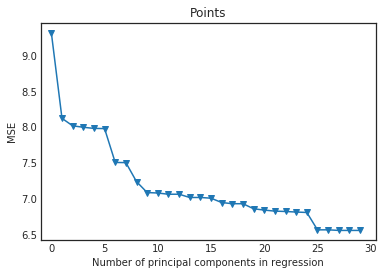

In [99]:
# reduce 결과로 한것
pca2 = PCA()
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)
regr = LinearRegression()
mse = []

score = -1*cross_val_score(regr, np.ones((n,1)), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 30):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Points')
plt.xlim(xmin=-1);

In [100]:
X_reduced_test = pca2.transform(scale(X_test))[:,:10]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:10], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)**0.5

2.661868509265472

## Partial Least Squares

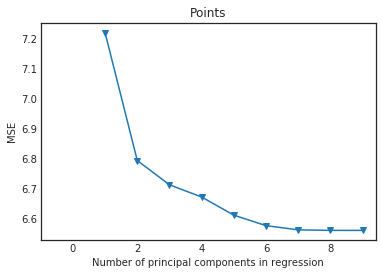

In [101]:

n = len(X_train)

kf_10 = KFold(n_splits=10, shuffle=False, random_state=1)

mse = []

for i in np.arange(1,10):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 10), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Points')
plt.xlim(xmin=-1);


In [102]:
pls = PLSRegression(n_components=8)
pls.fit(scale(X_train), y_train)

sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))


2.542741764310806

In [ ]:
GBR = GradientBoostingRegressor(loss=’ls’, learning_rate=0.1)
GBR.fit(scale(X_train), y_train)

sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

## RandomForestRegressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=1)
rfr.fit(scale(X_train), y_train)
mean_squared_error(y_test, ridge.predict(scale(X_test)))**0.5

2.5459033379546456

## ensemble

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
#r1 = LinearRegression()
r1 = ridge
r2 = lasso
r3 = rfr
r4 = regr
#r5 = pls

#er = VotingRegressor([('ridge', r1), ('lasso', r2),('rfr', r3),('regr', r4),('pls',r5)])
er = VotingRegressor([('ridge', r1), ('lasso', r2),('rfr', r3),('regr', r4)])
er.fit(X_train, y_train)
#print(er.fit(X_train, y_train).predict(X_test))
mean_squared_error(y_test, er.predict(scale(X_test)))**0.5

#er.predict(scale(X_test))
#mean_squared_error(y_test, er.predict(scale(X_test)))**0.5

ImportError: cannot import name 'VotingRegressor' from 'sklearn.ensemble' (/home/anaconda/lib/python3.7/site-packages/sklearn/ensemble/__init__.py)

## Test_Set에 prediction 넣기

In [104]:
print('lm :',sqrt(mean_squared_error(y_test, predictions)))
print('ridge :',sqrt(mean_squared_error(y_test, ridge.predict(scale(X_test)))))
print('lasso :',sqrt(mean_squared_error(y_test, lasso.predict(scale(X_test)))))
print('regr :',mean_squared_error(y_test, pred)**0.5)
print('pls :',sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))
print('rfr :',mean_squared_error(y_test, ridge.predict(scale(X_test)))**0.5)

lm : 2.5431736805792813
ridge : 2.5459033379546456
lasso : 2.5431170633281757
regr : 2.661868509265472
pls : 2.542741764310806
rfr : 2.5459033379546456


In [105]:
#test set에 col 추가
prediction = lm.predict(X_test_set)
X_test_set['prediction'] = prediction

In [106]:
X_test_set.to_excel("./wine_result.xlsx")

In [107]:
import pandas as pd
data = pd.read_excel("./train_rev2.xlsx",index_col=0,parse_dates=[0])
data1 = pd.read_excel("./test_rev2.xlsx",index_col=0,parse_dates=[0])

In [109]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ds4user4/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

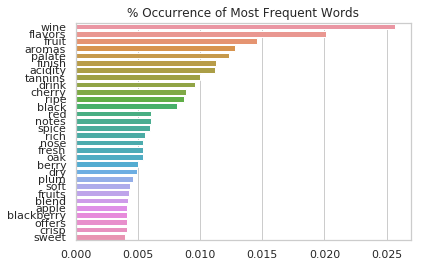

ImportError: cannot import name 'VotingRegressor' from 'sklearn.ensemble' (/home/anaconda/lib/python3.7/site-packages/sklearn/ensemble/__init__.py)


The following command must be run outside of the IPython shell:

    $ pip install VotingRegressor

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
